C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Best covariance type: full


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

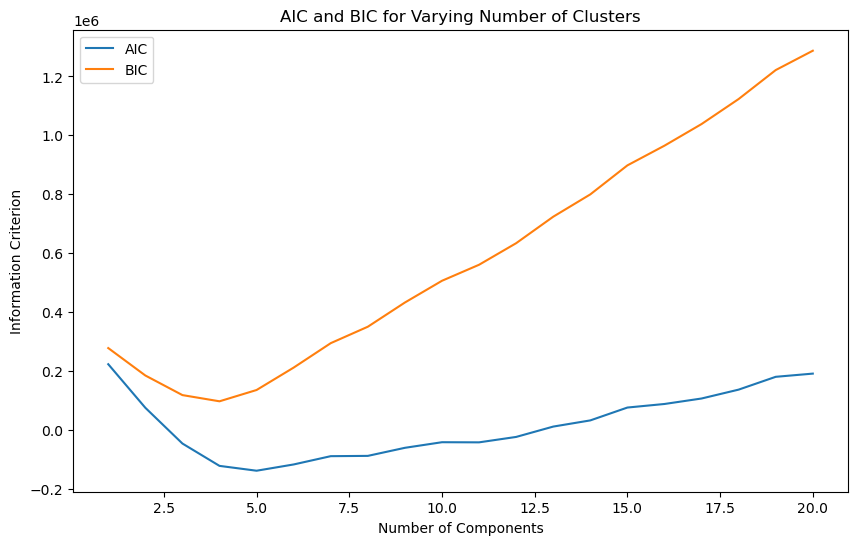

Minimum number of clusters: 5
Hard clustering assignments: [3 4 4 3 3 4 4 0 3 0 0 4 1 1 3 4 2 3 4 2 1 2 3 4 3 4 3 1 1 4 3 4 4 1 4 3 2
 3 1 0 1 0 4 4 2 3 4 3 0 3 2 2 1 4 4 3 2 0 1 3 1 4 0 3 0 0 4 2 1 0 3 3 4 4
 2 0 4 1 0 2 1 4 3 1 0 2 4 1 1 0 4 0 3 4 2 3 2 0 0 1 0 2 2 4 2 1 4 1 2 0 4
 0 1 1 1 3 1 2 0 3 2 1 1 1 1 0 0 2 1 1 1 2 2 2 3 0 3 0 2 2 1 1 3 3 1 0 2 3
 3 0 4 0 3 3 4 4 4 4 4 3 4 2 1 0 2 0 0 1 3 3 0 0 0 1 1 1 2 2 1 2 4 4 2 3 4
 4 3 3 0 3 0 1 3 3 4 2 0 4 0 0 4 1 2 1 1 4 0 3 4 2 2 4 2 0 4 1 3 1 3 1 0 1
 0 3 0 0 3 2 1 2 3 1 0 1 4 1 4 0 2 4]
Soft clustering probabilities shape: (240, 5)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


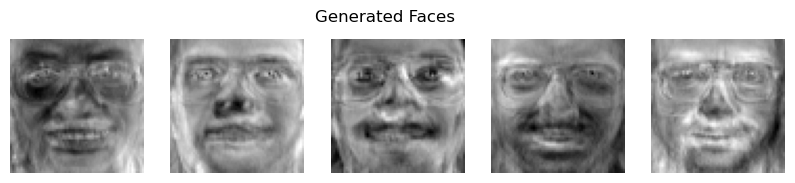

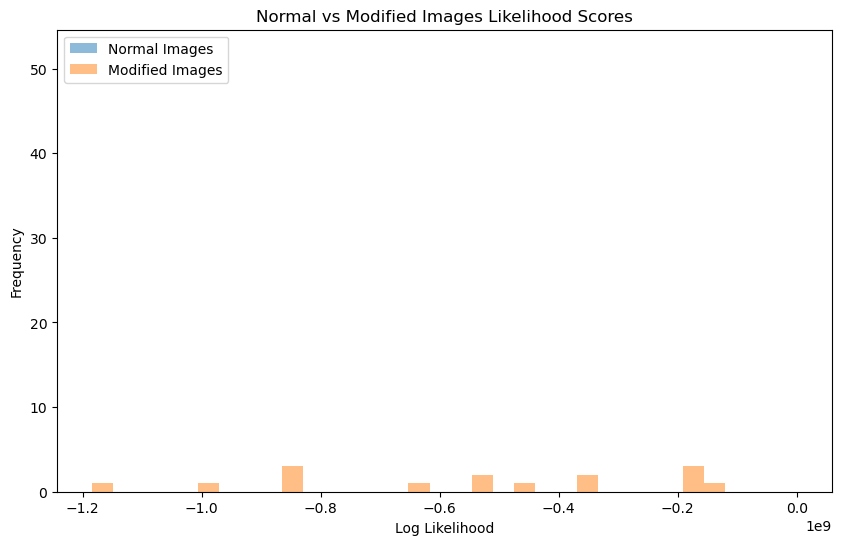

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import random

# Load the dataset
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

# Stratified split into training (60%), validation (20%), and test set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to retain 99% of the variance
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train_scaled)

# Fit GMM with different covariance types to find the best fit
covariance_types = ['full', 'tied', 'diag', 'spherical']
best_aic = np.inf
best_covariance = None

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=10, covariance_type=cov_type)
    gmm.fit(X_train_pca)
    aic = gmm.aic(X_train_pca)
    if aic < best_aic:
        best_aic = aic
        best_covariance = cov_type

print(f'Best covariance type: {best_covariance}')

# Determine the minimum number of clusters
n_components = np.arange(1, 21)
aic = []
bic = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, covariance_type=best_covariance)
    gmm.fit(X_train_pca)
    aic.append(gmm.aic(X_train_pca))
    bic.append(gmm.bic(X_train_pca))

plt.figure(figsize=(10, 6))
plt.plot(n_components, aic, label='AIC')
plt.plot(n_components, bic, label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for Varying Number of Clusters')
plt.legend()
plt.show()

optimal_n_components = n_components[np.argmin(aic)]  # Use AIC to determine optimal number
print(f'Minimum number of clusters: {optimal_n_components}')

# Fit the GMM with optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components, covariance_type=best_covariance)
gmm.fit(X_train_pca)

# Output hard clustering assignments
hard_assignments = gmm.predict(X_train_pca)
print('Hard clustering assignments:', hard_assignments)

# Output soft clustering probabilities
soft_probabilities = gmm.predict_proba(X_train_pca)
print('Soft clustering probabilities shape:', soft_probabilities.shape) # Shape is (n_samples, n_components)

# Generating new faces and visualizing them
new_faces = gmm.sample(5)[0]  # Generate 5 new faces
new_faces_pca = pca.inverse_transform(new_faces)  # Transform back to original space

# Visualizing the generated faces
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(new_faces_pca[i].reshape(64, 64), cmap='gray')
    plt.axis('off')
plt.suptitle('Generated Faces')
plt.show()

# Modify some images (e.g., rotate, flip, darken)
def modify_images(X):
    modified_images = []
    for img in X[:5]:  # modify first 5 images for simplicity
        img = img.reshape(64, 64)
        img_rotated = np.rot90(img)  # Rotate image
        img_flipped = np.fliplr(img)  # Flip image
        img_darken = img * 0.5  # Darken image
        modified_images.extend([img_rotated.flatten(), img_flipped.flatten(), img_darken.flatten()])
    return np.array(modified_images)

modified_images = modify_images(X_train)

# Score the normal images
normal_scores = gmm.score_samples(X_train_pca)

# Score the modified images
modified_images_pca = pca.transform(scaler.transform(modified_images))
anomaly_scores = gmm.score_samples(modified_images_pca)

plt.figure(figsize=(10, 6))
plt.hist(normal_scores, bins=30, alpha=0.5, label='Normal Images')
plt.hist(anomaly_scores, bins=30, alpha=0.5, label='Modified Images')
plt.xlabel('Log Likelihood')
plt.ylabel('Frequency')
plt.legend()
plt.title('Normal vs Modified Images Likelihood Scores')
plt.show()
